In [4]:
# importing libraries
import pandas as pd

In [5]:
# importing the dataset
data= pd.read_csv('heart.csv')

In [6]:
# taking care of null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# taking caare of dduplicate values
data_dup = data.duplicated().any()

In [8]:
data_dup

True

In [9]:
data=data.drop_duplicates()

In [10]:
data_dup= data.duplicated().any()

In [11]:
data_dup

False

In [12]:
# data processing
cate_val=[]
cont_val=[]

for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [13]:
# encodding categorical data
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [14]:
data['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [15]:
cate_val.remove('sex')
cate_val.remove('target')


In [16]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# feature scaling
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
st=StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [20]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    float64
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 35.4 KB


In [22]:
# splitting data into training and testing
x= data.drop('target',axis=1)

In [23]:
y= data['target']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
# logistic regression
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log =LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [29]:
y_pred1=log.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test,y_pred1)

0.8360655737704918

In [32]:
# svm
from sklearn import svm

In [33]:
svm =svm.SVC()


In [34]:
svm.fit(x_train,y_train)

SVC()

In [35]:
y_pred2 = svm.predict(x_test)

In [59]:
accuracy_score(y_test,y_pred1)

0.8360655737704918

In [37]:
# knn
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier()

In [39]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [40]:
y_pred3=knn.predict(x_test)

In [41]:
accuracy_score(y_test,y_pred3)

0.8688524590163934

In [42]:
# decesion tree
from sklearn.tree import DecisionTreeClassifier


In [43]:
dt = DecisionTreeClassifier()

In [44]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [45]:
y_pred4 =dt.predict(x_test)

In [46]:
accuracy_score(y_test,y_pred4)


0.7868852459016393

In [47]:
# randdom forest
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier()

In [49]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [50]:
y_pred5 = rf.predict(x_test)

In [51]:
accuracy_score(y_test,y_pred5)

0.8524590163934426

In [52]:
x = data.drop('target',axis=1)
y = data['target']

In [53]:
x.shape

(302, 13)

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

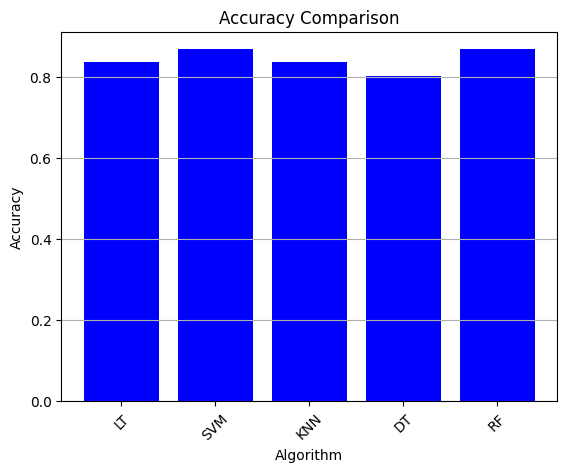

In [60]:
import matplotlib.pyplot as plt
algo = ['LT','SVM','KNN','DT','RF']
accuracy = [0.836,0.868,0.836,0.803,0.868]
plt.bar(algo,accuracy,color='b')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [57]:
import pandas as pd

In [232]:
ew_data = pd.DataFrame({
    'age':45,
    'sex':1,
    'cp': 3,
    'trestbps':110,
    'chol':264,
    'fbs':0,
    'restecg':1,
    'thalach':132,
    'exang':0,
    'oldpeak':1.2,
    'slope':1,
    'ca':0,
    'thal':3,
},index= [0])

In [233]:
ew_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,45,1,3,110,264,0,1,132,0,1.2,1,0,3


In [234]:
p = rf.predict(ew_data)
if p[0]==0:
    print("No Disease")
else:
    print("Disease")

No Disease


In [226]:
import joblib

In [252]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [253]:
model = joblib.load('model_joblib_heart')

In [254]:
model.predict(new_data)

array([0], dtype=int64)

In [255]:
from tkinter import *
import joblib

In [ ]:
import joblib
from tkinter import *

def show_entry_fields():
    try:
        p1 = int(e1.get())
        p2 = int(e2.get())
        p3 = int(e3.get())
        p4 = int(e4.get())
        p5 = int(e5.get())
        p6 = int(e6.get())
        p7 = int(e7.get())
        p8 = int(e8.get())
        p9 = int(e9.get())  # This was previously incorrect
        p10 = float(e10.get())
        p11 = int(e11.get())
        p12 = int(e12.get())
        p13 = int(e13.get())

        model = joblib.load('model_joblib_heart')
        result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]])

        if result == 0:
            Label(master, text="No Heart Disease").grid(row=31)
        else:
            Label(master, text="Possibility of Heart Disease").grid(row=31)
    except ValueError:
        Label(master, text="Please enter valid values").grid(row=31)
    except Exception as e:
        Label(master, text=f"Error: {str(e)}").grid(row=31)

master = Tk()
master.title("Heart Disease Prediction System")

Label(master, text="Heart Disease Prediction System", bg="black", fg="white").grid(row=0, columnspan=2)

Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)  # This was previously missing
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)  # This was previously missing
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)

Button(master, text='Predict', command=show_entry_fields).grid(row=14, columnspan=2)

mainloop()


C:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\varun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid